In [1]:
from ThermographyToolSet import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter

In [2]:
# Load the .mat file
data = loadmat('/Users/jaworskj/Desktop/Thermography_test_set/archive/Z_004.mat')
# Check keys if you are unsure about the variable name
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'imageArray', 'Fs', 'numberImages'])


In [3]:
thermography_data = data['imageArray']  # Adjust this to your dataset's variable name
# Inspect the shape of the data
print("Data shape:", thermography_data.shape)

Data shape: (256, 320, 1810)


In [4]:
#reorganizing data to match schemat of my prevous measurments
thermography_data=np.transpose(thermography_data,(2,0,1))
thermography_data.shape

(1810, 256, 320)

In [5]:
#clipping to square image
thermography_data=thermography_data[:,:,32:320-32]
thermography_data.shape

(1810, 256, 256)

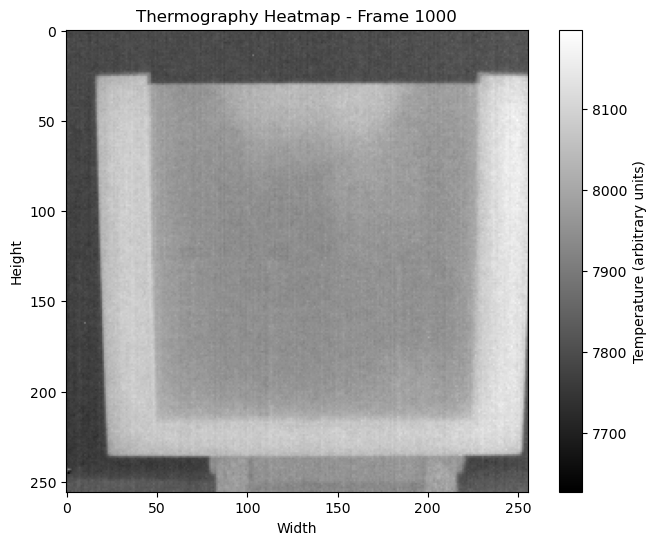

In [6]:
# Select a single frame (e.g., the first frame at index 0)
frame_index =1000
frame = thermography_data[frame_index,: , :]

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(frame, cmap='gray')  # Use 'hot' colormap for thermal data
plt.colorbar(label='Temperature (arbitrary units)')
plt.grid(False)
plt.title(f"Thermography Heatmap - Frame {frame_index}")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [7]:
phasegrame_data=phasegram(thermography_data)

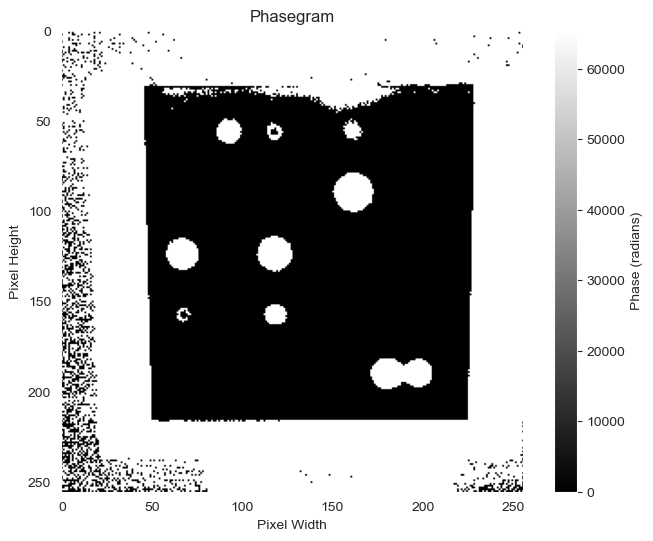

In [10]:
plt.figure(figsize=(8,6))
plt.imshow(phasegrame_data[5],cmap='gray')
plt.colorbar(label='Phase (radians)')
plt.grid(False)
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.title("Phasegram")
plt.show()

In [7]:
thermography_data.shape

(1810, 256, 256)

In [14]:
reshaped_thermography=thermography_data.reshape(thermography_data.shape[0],thermography_data.shape[1]*thermography_data.shape[2])
reshaped_thermography.shape

(1810, 65536)

In [15]:
reshaped_thremography=np.transpose(reshaped_thermography,(1,0))

In [16]:
reshaped_thremography.shape

(65536, 1810)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=3)
pca.fit(reshaped_thremography)

PCA(n_components=3)

In [19]:
PCT=pca.transform(reshaped_thremography)

In [20]:
PCT.shape

(65536, 3)

In [21]:
PCT=np.transpose(PCT,(1,0))
PCT=PCT.reshape(PCT.shape[0],thermography_data.shape[1],thermography_data.shape[2])

Text(0, 0.5, 'Heidgh of the image')

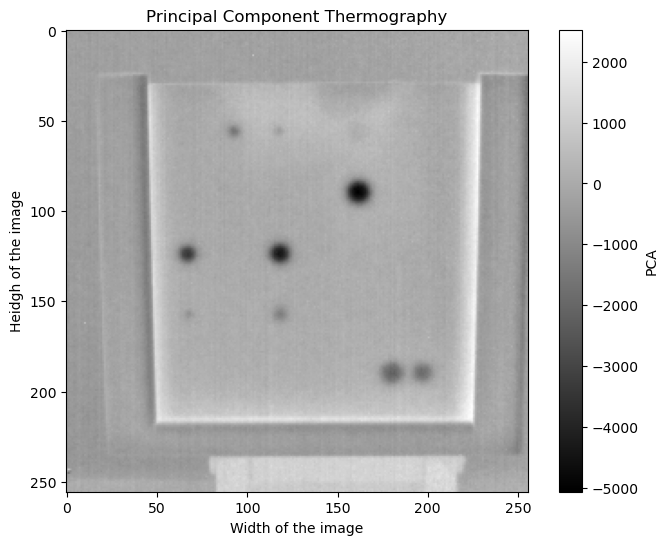

In [27]:
plt.figure(figsize=(8,6))
plt.imshow(PCT[2],cmap='gray')
plt.grid(False)
plt.colorbar(label='PCA')
plt.title('Principal Component Thermography')
plt.xlabel('Width of the image')
plt.ylabel('Heidgh of the image')

In [7]:
PCT_data=PCT(thermography_data,3)

Text(0, 0.5, 'Heidgh of the image')

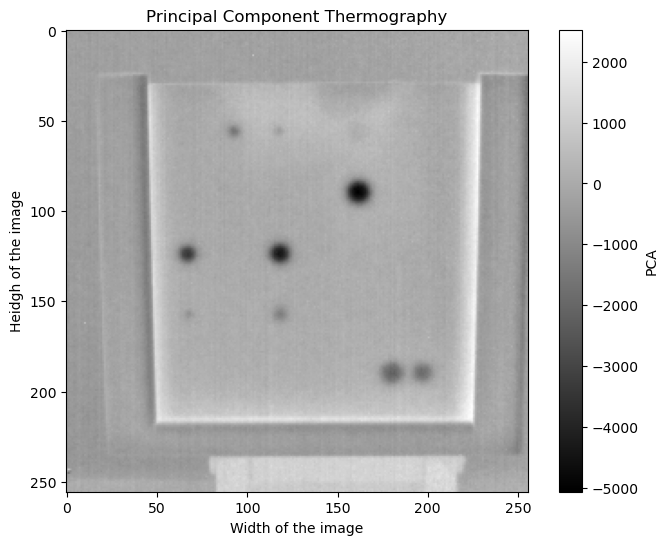

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(PCT_data[2],cmap='gray')
plt.grid(False)
plt.colorbar(label='PCA')
plt.title('Principal Component Thermography')
plt.xlabel('Width of the image')
plt.ylabel('Heidgh of the image')

<h1>TSR